In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler

import matplotlib.pyplot as plt
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("data/processed_data.csv")

# Generating Balanced Dataset with Over-sampling

1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64



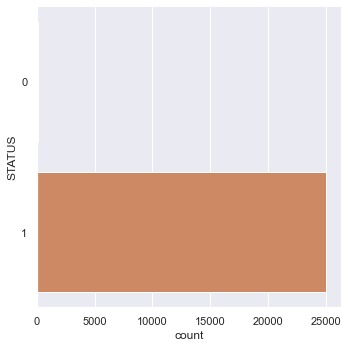

In [199]:
# Function for calculating ratio of majority and minority class
def ratio(df):
    print(df['STATUS'].value_counts())
    print(df['STATUS'].value_counts(normalize=True))
    sb.catplot(y = "STATUS", data = df, kind = "count")
    print()
 
# Function to calculating metrics of confusionMatrix
def confusionMatrix(matrix, flag):
    #TN FP
    #FN TP
    
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    if flag:
        print("Test Dataset: ")
    else:
        print("Train Dataset: ")
    
    print("True Positive Rate: {:.2f}%".format((TP * 100)/(TP + FN)))
    print("False Positive Rate: {:.2f}%\n".format((FP * 100)/(FP + TN)))
    
    print("True Negative Rate: {:.2f}%".format((TN * 100)/(TN + FP)))
    print("False Negative Rate: {:.2f}%\n".format((FN * 100)/(FN + TP)))
    print()

ratio(df)

In [208]:
non_int = ["ID", "TOTAL_GOOD_DEBT", "TOTAL_BAD_DEBT"]
for col in df:
    if df[col].dtypes == "object":
        non_int.append(col)
new_df = df.drop(columns=non_int)

In [209]:
# Considering numeric vars only
# Over-sampling (using SMOTE - Synthetic Minority Over-sampling TEchnique)

# Dictionary to store top 5 variables - {score : var_name}
top = {}

y = pd.DataFrame(new_df["STATUS"])
for col in new_df:
    if col != 'STATUS' and col != 'GOOD_PERCENT' and col != 'FLAG_EMAIL':
        X = pd.DataFrame(new_df[col])
        
        # Resampling the minority class. The strategy can be changed as required.
        sm = SMOTE(sampling_strategy='minority', random_state=42)

        # Fit and resample imbalanced data
        X_res, y_res = sm.fit_resample(X, y) # kmeans_smote.fit_resample(X, y)
        print(col)

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25)

        # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        score = dectree.score(X_train, y_train)
        print(f'Accuracy  :\t{score}')
        print()
        confusionMatrix(confusion_matrix(y_train1, y_train_pred), 0)
        if len(top) < 3:
            top[score] = col
        elif score > min(top.keys()):
            top.pop(min(top.keys()))
            top[score] = col

print()
print('BEST VARIABLES:')
for key, val in top.items():
    print(f'{val}      \t: {key}')

FLAG_OWN_CAR
Train Data for FLAG_OWN_CAR
Accuracy  :	0.5017566272756308

Train Dataset: 
True Positive Rate: 0.00%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 100.00%


FLAG_OWN_REALTY
Train Data for FLAG_OWN_REALTY
Accuracy  :	0.5138667092515703

Train Dataset: 
True Positive Rate: 64.58%
False Positive Rate: 64.15%

True Negative Rate: 35.85%
False Negative Rate: 35.42%


CNT_CHILDREN
Train Data for CNT_CHILDREN
Accuracy  :	0.5410145853295006

Train Dataset: 
True Positive Rate: 8.38%
False Positive Rate: 8.37%

True Negative Rate: 91.63%
False Negative Rate: 91.62%


AMT_INCOME_TOTAL
Train Data for AMT_INCOME_TOTAL
Accuracy  :	0.6372298520174599

Train Dataset: 
True Positive Rate: 41.60%
False Positive Rate: 42.72%

True Negative Rate: 57.28%
False Negative Rate: 58.40%


FLAG_MOBIL
Train Data for FLAG_MOBIL
Accuracy  :	0.5002927712126052

Train Dataset: 
True Positive Rate: 0.00%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negativ

# Prediction Using Balanced Dataset

Before Over-sampling: 
1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64

       AMT_INCOME_TOTAL  APPLICANT_AGE  YEARS_WORKING
count      2.513400e+04   25134.000000   25134.000000
mean       1.948339e+05      40.536166       7.204106
std        1.045110e+05       9.559474       6.414231
min        2.700000e+04      21.000000       0.000000
25%        1.350000e+05      33.000000       3.000000
50%        1.800000e+05      40.000000       5.000000
75%        2.250000e+05      48.000000      10.000000
max        1.575000e+06      67.000000      43.000000

After Over-sampling: 
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7449430426913659

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7440114979239859



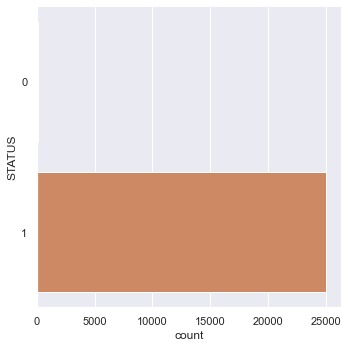

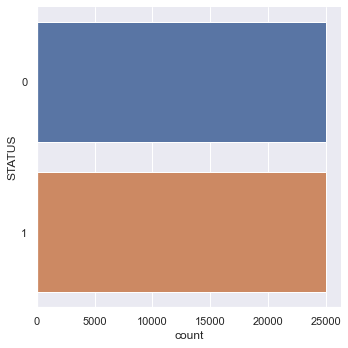

In [210]:
'''Over-sampling'''

y1 = pd.DataFrame(new_df['STATUS'])
print('Before Over-sampling: ')
ratio(y1)

best = top.values()
for col in new_df:
    if col not in best:
        new_df.drop(columns=col, inplace=True)
x1 = pd.DataFrame(new_df)
print(x1.describe())
print()

X_temp, y_temp = sm.fit_resample(x1, y1)
print('After Over-sampling: ')
ratio(y_temp)


'''Prediction'''

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.25)

dectree = DecisionTreeClassifier(max_depth = 7) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
print()


<AxesSubplot:>

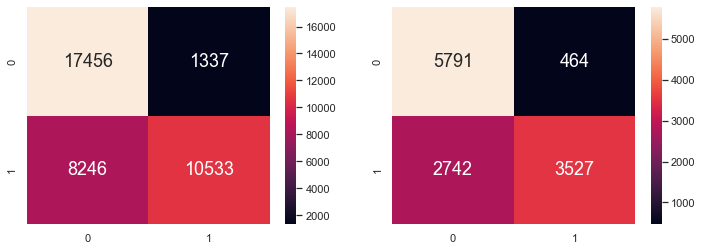

In [211]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [223]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(64,12), dpi = 600)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])

[Text(0.5616399082568807, 0.9375, 'YEARS_WORKING <= 4.5\ngini = 0.5\nsamples = 37572\nvalue = [18793, 18779]\nclass = Bad'),
 Text(0.27809633027522934, 0.8125, 'AMT_INCOME_TOTAL <= 405068.0\ngini = 0.476\nsamples = 20596\nvalue = [12563, 8033]\nclass = Bad'),
 Text(0.12041284403669725, 0.6875, 'AMT_INCOME_TOTAL <= 116991.0\ngini = 0.489\nsamples = 18492\nvalue = [10648, 7844]\nclass = Bad'),
 Text(0.04128440366972477, 0.5625, 'APPLICANT_AGE <= 27.5\ngini = 0.399\nsamples = 6181\nvalue = [4477, 1704]\nclass = Bad'),
 Text(0.03211009174311927, 0.4375, 'gini = 0.0\nsamples = 237\nvalue = [0, 237]\nclass = Good'),
 Text(0.05045871559633028, 0.4375, 'YEARS_WORKING <= 2.5\ngini = 0.372\nsamples = 5944\nvalue = [4477, 1467]\nclass = Bad'),
 Text(0.027522935779816515, 0.3125, 'APPLICANT_AGE <= 56.0\ngini = 0.299\nsamples = 4606\nvalue = [3762, 844]\nclass = Bad'),
 Text(0.01834862385321101, 0.1875, 'AMT_INCOME_TOTAL <= 65250.0\ngini = 0.288\nsamples = 4558\nvalue = [3762, 796]\nclass = Bad'),
